# Video: Implementing Value Iteration

Value iteration is our first algorithm for computing optimal values for Markov decision processes with infinite horizons.
This video implements data structures to represent a finite Markov decision process and compute its optimal values.

Script:
* Value iteration is a simple algorithm for computing optimal values for Markov decision processes.
* It works for finite Markov decision processes and converges to the infinite horizon values.

## Problem Setup

Problem size:
* $k$ actions
* $n$ states

Problem dynamics:
* $\mathcal{R}: k \times n$ array of expected rewards for each action+state
* $\mathcal{P}: k \times n \times n$ array of transition probabilities for each action/current state/next state.
* $\gamma$ discount factor for future rewards

Script:
* We will describe the problem using $k$ actions and $n$ states.
* The rewards will be in a 2-dimensional array $\mathcal{R}$ with shape $k$ by $n$.
* The rows of $\mathcal{R}$ will identify actions, the columns of $\mathcal{r}$ will identify states, and the values in $\mathcal{R}$ will be the expected rewards.
* The transition probabilities will be in a 3-dimensional array $\mathcal{P}$ where the first dimension identifies an action, the second dimension identifies the current state, and third dimension identifies the next state.
* Finally, the parameter $\gamma$ will be the discount factor.

## Value Iteration Algorithm

1. Initialize $\mathbf{v}_0 = [0,\ldots, 0]$.
2. Repeat until values stop changing significantly:
\begin{array}{rcl}
\mathbf{v}_{i+1}&=&\max_a \mathcal{R}^a + \gamma \mathcal{P}^a \mathbf{v}_i
\end{array}

Script:
* Value iteration typically starts with a vector of all zero values.
* This initialization will lead to the $i$th value vector corresponding to the best possible value achievable within $i$ steps.
* In the update formula, $\mathcal{R}^a$ denotes the average state rewards after picking action $a$ while $\mathcal{P}^a$ similarly denotes the transition probabilities after picking action $a$.
* Then given the $i$th vector of values, the next vector of values is computed for each possible first action $a$, using $\gamma$, $\mathcal{R}^a$ and $\mathcal{P}^a$ to compute the immediate reward and the discounted future reward.
* This process continues as long as the values keep changing by meaningful amounts.
* Specific thresholds for meaningful will depend on the particular problem.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# one step state-action values from a value estimate.
# will use this a lot!

def compute_qT_once(R, P, gamma, v):
    return R + gamma * P @ v

Script:
* This function, `compute_qT_once`, will compute the inner expression of the value update for all actions at once.
* It will return an array with a value for every pair of state and action.
* It is named after the $q$ function for state and action values, but transposed since the array is indexed by action first and then state.
* You will see this function and the next repeated in later videos about different value and policy iteration algorithms.

In [ ]:
def iterate_values_once(R, P, gamma, v):
    return np.max(compute_qT_once(R, P, gamma, v), axis=0)

Script:
* This function will compute the new values for one pass through the loop.
* All it does is compute the transposed $q$ values and then take the maximum value by action for each state.
* So the result has a value for each state based on one optimal choice based on the previously computed values.

In [ ]:
def value_iteration(R, P, gamma, max_iterations=100, tolerance=0.001):
    # initial approximation v_0
    v_old = np.zeros(R.shape[-1])

    for i in range(max_iterations):
        # compute v_{i+1}
        v_new = iterate_values_once(R, P, gamma, v_old)

        # check if values did not change much
        if np.max(np.abs(v_new - v_old)) < tolerance:
            return v_new

        v_old = v_new

    # return v_{max_iterations}
    return v_old

Script:
* Now we can write the whole value iteration function.
* I added two extra parameters for the maximum number of iterations and a default numerical tolerance.
* Both parameters are used to guarantee that value iteration stops in a timely manner.
* The function just consists of initializing the values to zero, and repeatedly iterating on the values until either the maximum number of iterations were made or the largest value change between updates was below the tolerance.

## Example Environment

<table>
<tr><td align="right">0🧊</td><td align="right">1🧊</td><td align="right">2🧊</td><td align="right">3🧊</td><td align="right">4🧊</td><td align="right">5🧊</td><td align="right">6🧊</td></tr>
<tr><td align="right">7🧊</td><td align="right">8🧊</td><td align="right">9🧊</td><td align="right">10🧊</td><td align="right">11🧊</td><td align="right">12🧊</td><td align="right">13🧊</td></tr>
<tr><td align="right">14🧊</td><td align="right">15🧊</td><td align="right">16🧊</td><td align="right">17🧊</td><td align="right">18🧊</td><td align="right">19🧊</td><td align="right">20🧊</td></tr>
<tr><td align="right">21🧊</td><td align="right">22🧊</td><td align="right">23🧊</td><td align="right">24🧊</td><td align="right">25🧊</td><td align="right">26🧊</td><td align="right">27🧊</td></tr>
<tr><td align="right">28🧊</td><td align="right">29🧊</td><td align="right">30🧊</td><td align="right">31🧊</td><td align="right">32🧊</td><td align="right">33🧊</td><td align="right">34🧊</td></tr>
<tr><td align="right">35🧊</td><td align="right">36🧊</td><td align="right">37🧊</td><td align="right">38🧊</td><td align="right">39🧊</td><td align="right">40🧊</td><td align="right">41🧊</td></tr>
<tr><td align="right">42🧊</td><td align="right">43🧊</td><td align="right">44🧊</td><td>45🧊</td><td align="right">46🧊</td><td align="right">47🧊</td><td align="right">48🐟</td></tr>
<tr><td></td></tr>
<tr><td align="right">49☑️</td></tr>
</table>

Script:
* Here is an example environment for a penguin agent to navigate.
* States 0-48 form a grid to navigate while state 49 is a terminal state.
* State 48 has a fish for the penguin and has reward 1.
* From that state, all transitions are to the done state 49 where the penguin stops.
* All the other states allow horizontal and vertical movement within the grid.


In [ ]:
actions = ["⬆️", "⬇️", "⬅️", "➡️"]

Script:
* The actions in this environment will just be moving the penguin up, down, left or right within the grid.
* If the action would move off the grid, the penguin will stay in the same position.


In [ ]:
P = np.zeros(shape=(len(actions), 50, 50))
for s in range(48):
    # row major order with (0,0) as top left
    x = s % 7
    y = s // 7

    # up action
    if y > 0:
        P[0, s, s-7] = 1
    else:
        P[0, s, s] = 1

    # down action
    if y < 6:
        P[1, s, s+7] = 1
    else:
        P[1, s, s] = 1

    # left action
    if x > 0:
        P[2, s, s-1] = 1
    else:
        P[2, s, s] = 1

    # right action
    if x < 6:
        P[3, s, s+1] = 1
    else:
        P[3, s, s] = 1

# fish state goes to terminal state
P[:,48,49] = 1

# stay in terminal state
P[:,49,49] = 1

## Example Environment Rewards

<table>
<tr><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
<tr><td></td></tr>
<tr><td>0</td></tr>
</table>

Script:
* Here are the rewards for each state.
* They do not depend on the actions.
* There is a reward of one for the fish state and all the other rewards are zero.

In [ ]:
R = np.zeros(shape=(4,50))
R[:,48] = 1
R

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.]])

Script:
* Here is the R array representing the rewards for this environment.
* This is pretty simple to setup since only one state has non-zero rewards.
* Let's plot where those values are just to spot check.

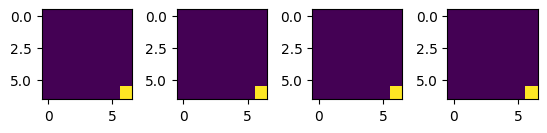

In [ ]:
for a in range(4):
    plt.subplot(1, 4, a + 1)
    plt.imshow(R[a,:49].reshape(7, 7));

plt.subplots_adjust(wspace=0.5)
plt.show();

Script:
* I left out the terminal state.
* Each action just has a reward when you get to the bottom left where the fish is.

In [ ]:
gamma=0.9
v_star = value_iteration(R, P, gamma)
v_star

array([0.28242954, 0.3138106 , 0.34867844, 0.38742049, 0.43046721,
       0.4782969 , 0.531441  , 0.3138106 , 0.34867844, 0.38742049,
       0.43046721, 0.4782969 , 0.531441  , 0.59049   , 0.34867844,
       0.38742049, 0.43046721, 0.4782969 , 0.531441  , 0.59049   ,
       0.6561    , 0.38742049, 0.43046721, 0.4782969 , 0.531441  ,
       0.59049   , 0.6561    , 0.729     , 0.43046721, 0.4782969 ,
       0.531441  , 0.59049   , 0.6561    , 0.729     , 0.81      ,
       0.4782969 , 0.531441  , 0.59049   , 0.6561    , 0.729     ,
       0.81      , 0.9       , 0.531441  , 0.59049   , 0.6561    ,
       0.729     , 0.81      , 0.9       , 1.        , 0.        ])

Script:
* Now we can just call the `value_iteration` function that we wrote earlier.
* You can see the zero value for the last state, the terminal state, since it is after the fish reward.
* Just before it, you can see the reward of one for getting to the fish.
* You can also see powers of 0.9 for the other states, but it is a little hard to follow.
* Let's plot that like the rewards.

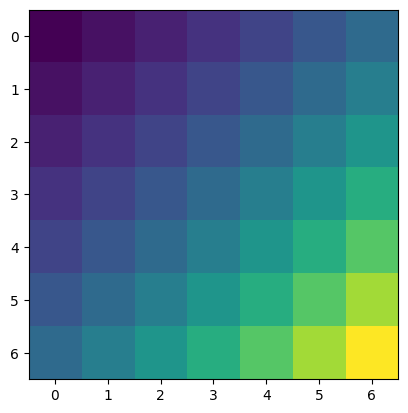

In [ ]:
plt.imshow(v_star[:49].reshape(7, 7));

Script:
* With this chart, you can see that the reward is based on the number of steps the penguin needs to get to the fish.

Script: (faculty on screen)
* Value iteration is an easy to implement method for computing optimal values.
* We will use variations on this algorithm for policy iteration methods which also return optimal actions.